In [0]:
from pyspark.sql import SparkSession # Importing Spark
s2 = SparkSession.builder.appName('builder').getOrCreate() # Creating a spark instance

In [0]:
# Data Imports
df = s2.read.csv('dbfs:/FileStore/shared_uploads/shhivramcss@gmail.com/hack_data.csv', inferSchema= True, 
           header= True)

In [0]:
# Checking the datatypes of the features
type(df.printSchema()) # One Categorical feature

root
-- Session_Connection_Time: double (nullable = true)
-- Bytes Transferred: double (nullable = true)
-- Kali_Trace_Used: integer (nullable = true)
-- Servers_Corrupted: double (nullable = true)
-- Pages_Corrupted: double (nullable = true)
-- Location: string (nullable = true)
-- WPM_Typing_Speed: double (nullable = true)

Out[27]: NoneType

In [0]:
# Separating the numrical and non-numerical datatypes
nums = []
objs = []
for i in df.dtypes:
  if(i[-1] == 'string'):
    objs.append(i[0])
  else:
    nums.append(i[0])
print(nums)
print(objs)

['Session_Connection_Time', 'Bytes Transferred', 'Kali_Trace_Used', 'Servers_Corrupted', 'Pages_Corrupted', 'WPM_Typing_Speed']
['Location']

====================================================================================================

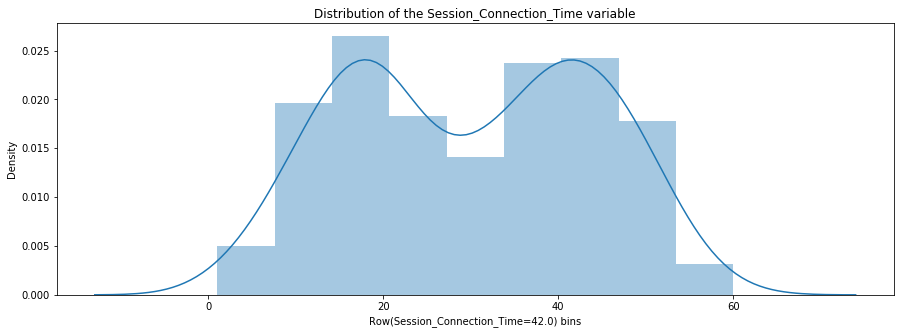

====================================================================================================
Descriptive Statistics of the numerical columns
{'count': '334', 'mean': '30.008982035928145', 'stddev': '14.088200614636158', 'min': '1.0', 'max': '60.0'}



====================================================================================================

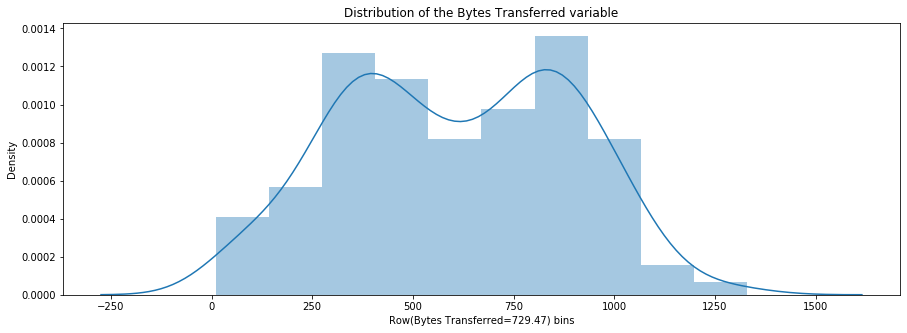

====================================================================================================
Descriptive Statistics of the numerical columns
{'count': '334', 'mean': '607.2452694610777', 'stddev': '286.33593163576757', 'min': '10.0', 'max': '1330.5'}



====================================================================================================

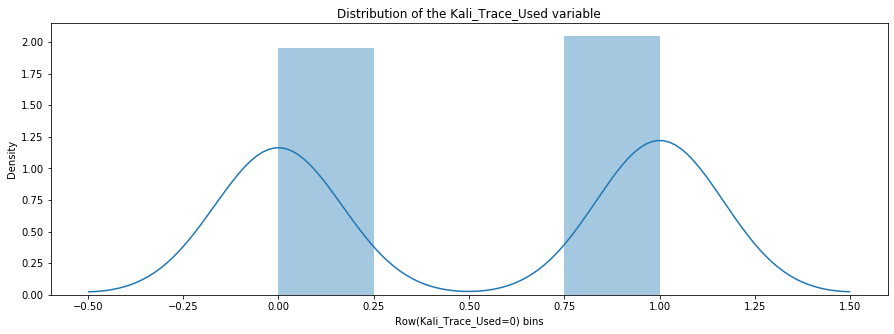

====================================================================================================
Descriptive Statistics of the numerical columns
{'count': '334', 'mean': '0.5119760479041916', 'stddev': '0.5006065264451406', 'min': '0', 'max': '1'}



====================================================================================================

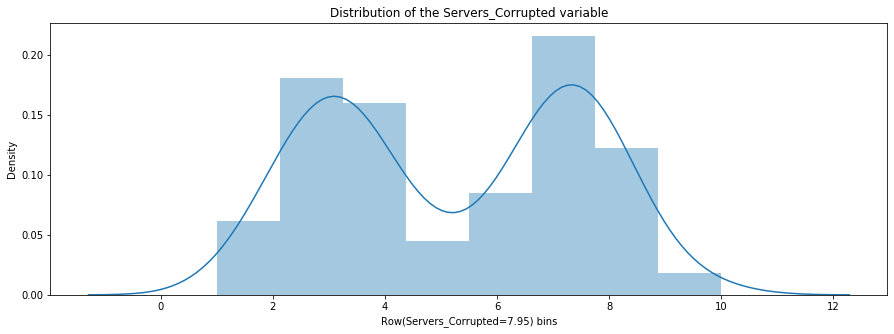

====================================================================================================
Descriptive Statistics of the numerical columns
{'count': '334', 'mean': '5.258502994011977', 'stddev': '2.30190693339697', 'min': '1.0', 'max': '10.0'}



====================================================================================================

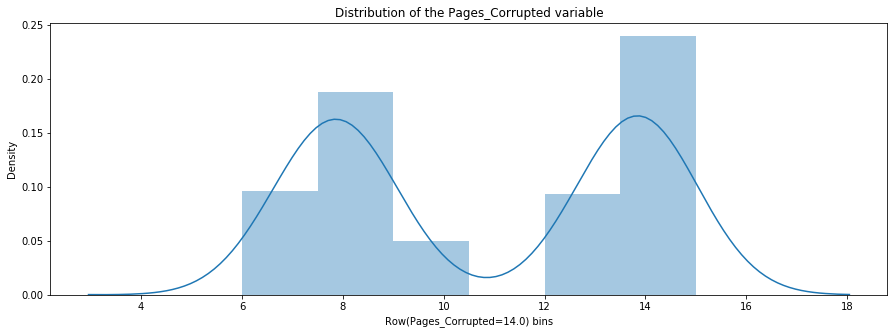

====================================================================================================
Descriptive Statistics of the numerical columns
{'count': '334', 'mean': '10.838323353293413', 'stddev': '3.06352633036022', 'min': '6.0', 'max': '15.0'}



====================================================================================================

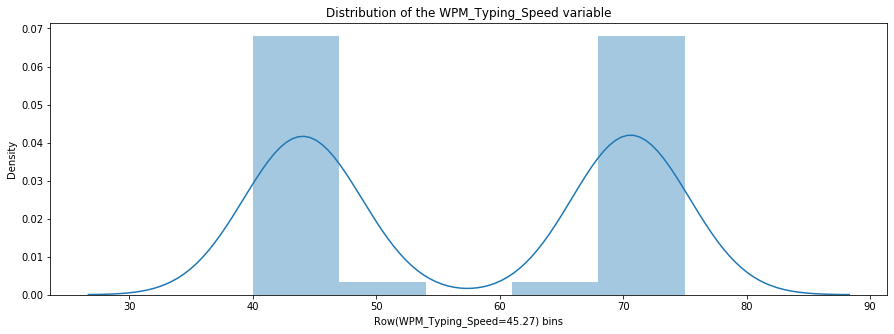

====================================================================================================
Descriptive Statistics of the numerical columns
{'count': '334', 'mean': '57.342395209580864', 'stddev': '13.41106336843464', 'min': '40.0', 'max': '75.0'}

In [0]:
# Ploting the distribution of the numeric columns
import seaborn as sns
import matplotlib.pyplot as plt
for j in nums:
  print("="*100)
  x = []
  for i in df.select(j).collect():
    x.append(i[0])
  plt.figure(figsize = (15,5))
  plt.title("Distribution of the {} variable".format(j))
  sns.distplot(x)
  plt.xlabel("{} bins".format(i))
  plt.ylabel("Density")
  plt.show()
  print("="*100)
  print("Descriptive Statistics of the numerical columns")
  print(dict(df.select(j).describe().collect()))
  print("\n\n")

Too many level 181 for a barplot, So ploting only the highest 15 values

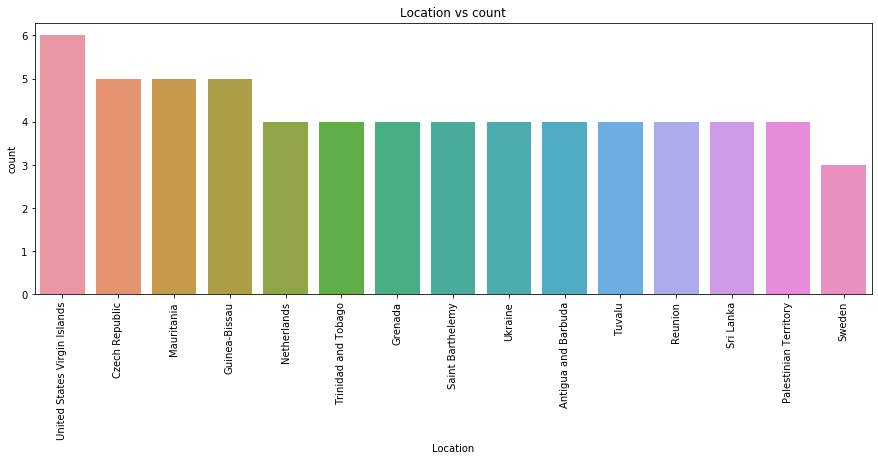

In [0]:
for i in objs:
  counts = df.groupby(i).count()
  if(counts.count() > 20):
    print("Too many level {} for a barplot, So ploting only the highest 15 values".format(counts.count()))
    _X = counts.toPandas()
    _X = _X.sort_values(by = _X.columns[-1], ascending = False)[0:15]
    plt.figure(figsize= (15,5))
    plt.title("{} vs {}".format(_X.columns[0], _X.columns[1]))
    sns.barplot(x = _X.iloc[:,0] , y = _X.iloc[:,1])
    plt.xlabel(_X.columns[0])
    plt.ylabel(_X.columns[1])
    plt.xticks(rotation = 90)
    plt.show()
  else:
    _X = counts().toPandas()
    plt.figure(figsize= (15,5))
    plt.title("{} vs {}".format(_X.columns[0], _X.columns[1]))
    sns.barplot(x = _X.iloc[:,0] , y = _X.iloc[:,1])
    plt.xlabel(_X.columns[0])
    plt.ylabel(_X.columns[1])
    plt.show()

In [0]:
# Data Preprocessing for the Clustering Algorithm
from pyspark.ml.feature import (StringIndexer, OneHotEncoder, VectorAssembler)

In [0]:
# One Hot Encoding the Location column
String_ind = StringIndexer (inputCol = 'Location', outputCol = 'String_index')
S_ind_df = String_ind.fit(df).transform(df)
one_hot = OneHotEncoder(inputCol= 'String_index', outputCol= 'One_hot_encoded')
one_hot_ind_df = one_hot.fit(S_ind_df).transform(S_ind_df)
one_hot_ind_df.show(4)

+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+------------+-----------------+
Session_Connection_Time|Bytes Transferred|Kali_Trace_Used|Servers_Corrupted|Pages_Corrupted| Location|WPM_Typing_Speed|String_index| One_hot_encoded|
+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+------------+-----------------+
 8.0| 391.09| 1| 2.96| 7.0| Slovenia| 72.37| 88.0| (180,[88],[1.0])|
 20.0| 720.99| 0| 3.04| 9.0|British Virgin Is...| 69.08| 47.0| (180,[47],[1.0])|
 31.0| 356.32| 1| 3.71| 8.0| Tokelau| 70.58| 92.0| (180,[92],[1.0])|
 2.0| 228.08| 1| 2.48| 8.0| Bolivia| 70.8| 104.0|(180,[104],[1.0])|
+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+------------+-----------------+
only showing top 4 rows

In [0]:
# Creating vector of features
vc = VectorAssembler(inputCols= ['Session_Connection_Time',
 'Bytes Transferred',
 'Kali_Trace_Used',
 'Servers_Corrupted',
 'Pages_Corrupted',
 'WPM_Typing_Speed'], outputCol='Features')
final_df = vc.transform(one_hot_ind_df)
final_df.show(3)

+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+------------+----------------+--------------------+
Session_Connection_Time|Bytes Transferred|Kali_Trace_Used|Servers_Corrupted|Pages_Corrupted| Location|WPM_Typing_Speed|String_index| One_hot_encoded| Features|
+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+------------+----------------+--------------------+
 8.0| 391.09| 1| 2.96| 7.0| Slovenia| 72.37| 88.0|(180,[88],[1.0])|[8.0,391.09,1.0,2...|
 20.0| 720.99| 0| 3.04| 9.0|British Virgin Is...| 69.08| 47.0|(180,[47],[1.0])|[20.0,720.99,0.0,...|
 31.0| 356.32| 1| 3.71| 8.0| Tokelau| 70.58| 92.0|(180,[92],[1.0])|[31.0,356.32,1.0,...|
+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+------------+----------------+--------------------+
only showing top 3 rows

In [0]:
# Scaling the vector of features
from pyspark.ml.feature import StandardScaler
ss =  StandardScaler(inputCol= 'Features', outputCol= 'features')
scaled_df = ss.fit(final_df).transform(final_df)

In [0]:
scaled_df.show(3)

+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+------------+----------------+--------------------+
Session_Connection_Time|Bytes Transferred|Kali_Trace_Used|Servers_Corrupted|Pages_Corrupted| Location|WPM_Typing_Speed|String_index| One_hot_encoded| features|
+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+------------+----------------+--------------------+
 8.0| 391.09| 1| 2.96| 7.0| Slovenia| 72.37| 88.0|(180,[88],[1.0])|[0.56785108466505...|
 20.0| 720.99| 0| 3.04| 9.0|British Virgin Is...| 69.08| 47.0|(180,[47],[1.0])|[1.41962771166263...|
 31.0| 356.32| 1| 3.71| 8.0| Tokelau| 70.58| 92.0|(180,[92],[1.0])|[2.20042295307707...|
+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+------------+----------------+--------------------+
only showing top 3 rows

In [0]:
# Invoking the KMeans algorithm
from pyspark.ml.clustering import KMeans

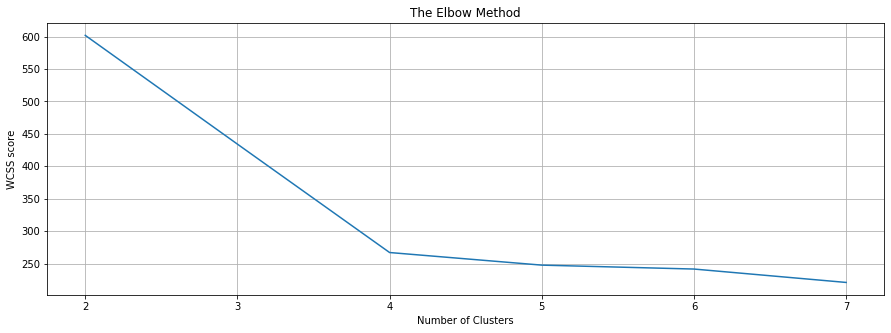

In [0]:
# Ploting the elbow curve

import pandas as pd
x = [2,3,4,5,6,7]
wcss = {}
for i in x:
  Kmeans_model = KMeans(featuresCol= 'features', k = i).fit(scaled_df)
  wcss[i] = Kmeans_model.summary.trainingCost
Wcss = pd.DataFrame(wcss, index = [0]).T
Wcss.columns = ['WCSS']

plt.figure(figsize= (15,5))
plt.title("The Elbow Method")
sns.lineplot(x = Wcss.index, y= Wcss['WCSS'])
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS score")
plt.grid()
plt.show()

In [0]:
# From the Elbow curve the optimal number of clusters is 4 clusters
k_means_model_2 = KMeans(k=4, seed = 2).fit(final_df.select("features"))
preds_2 = k_means_model_2.transform(scaled_df)

In [0]:

# Visualizing the clusters
from pyspark.ml.feature import PCA

principle_component_analysis =  PCA(k =2, inputCol= 'features', outputCol= 'pc_components')
model = principle_component_analysis.fit(scaled_df).transform(scaled_df)
#model.select('pc_components').show(truncate=False)

pc1 = [] 
pc2 = []
for i in model.select('pc_components').collect():
  pc1.append(i[0][0])
  pc2.append(i[0][1])


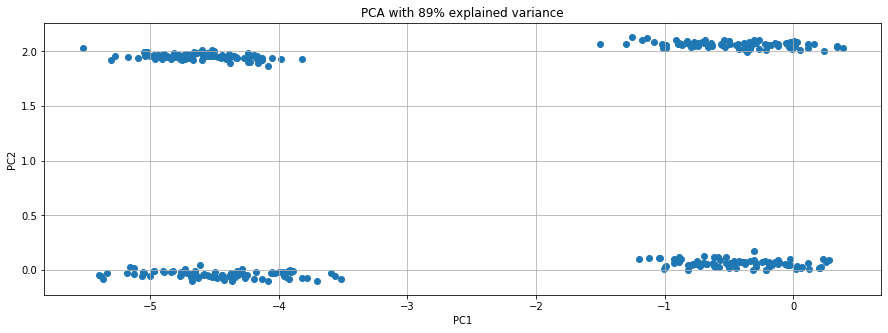

In [0]:
plt.figure(figsize= (15,5))  
plt.title("PCA with 89% explained variance")
plt.scatter(pc1, pc2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

In [0]:
print("Explained Variance by the princeple components is ", principle_component_analysis.fit(final_df).explainedVariance.sum())

Explained Variance by the princeple components is 0.8906380969597126